<a href="https://colab.research.google.com/github/Anshul007/PyTorch-for-deep-learning-in-a-day/blob/main/Daniel_Bourke_Lecture_02_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification

# Importing Libraries

In [ ]:
import sklearn
from sklearn.datasets import make_circles

import pandas as pd

In [ ]:
# create data
sample_size = 1000

# create circle
X,y = make_circles(n_samples= sample_size,
                   noise= 0.03,
                   random_state= 42)


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [ ]:
# X[:,0]

In [ ]:
# circles= pd.DataFrame(X, columns= ["X1","X2"])
# there is a challage here to add labels as well
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "labels": y})
circles.head(2)

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1


In [ ]:
circles["labels"].value_counts()

,count
labels,
1,500
0,500


### Plotting the data

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

[]

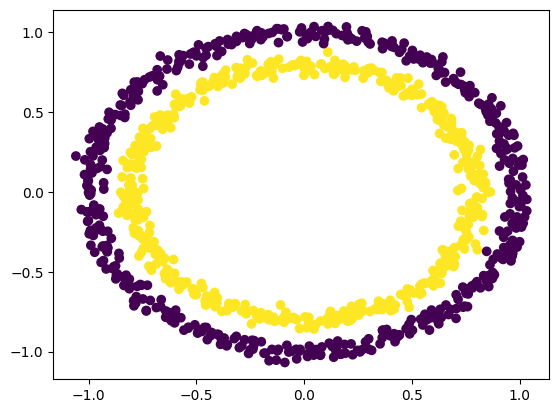

In [ ]:
plt.scatter(x= circles["X1"],
            y= circles["X2"],
            c=circles["labels"])
plt.plot()

### Turning data into tensors

> If we are using toch model then we have to convert our data into tensors

In [ ]:
import torch
torch.__version__

'2.5.0+cu121'

In [ ]:
# # since it is numpy array we can use `from_numpy`
# torch.from_numpy(X).type(torch.float).dtype

X = torch.tensor(X).type(torch.float)
y = torch.tensor(y).type(torch.float)

In [ ]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size= 0.2,
                                                   random_state = 42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

# 2. Building Model

In [ ]:
import torch
from torch import nn

# make device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now, Lets create the model:
1. Subclasses `nn.Module`  (almost all the model in PyTorch subclass `nn.Module`)
2. Create 2 `nn.linear()` layers that are capable of handling the shape of the data.
3. Defines a `forward()` method for outline the forward pass.
4. Initiate an instance of our model class.

In [ ]:
class circleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # create 2 nn.layers
    self.layer_1 = nn.Linear(in_features= 2, out_features= 7) # input layer
    self.layer_2 = nn.Linear(in_features= 7, out_features= 5) # hidden layer
    self.layer_3 = nn.Linear(in_features= 5, out_features= 1) # output layer

  # define a forward method that outline the forward pass
  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(X))) # x -> layer1 -> layer2.....

# initialize the model and send it to the target class
model_0 = circleModelV0().to(device)
model_0

circleModelV0(
  (layer_1): Linear(in_features=2, out_features=7, bias=True)
  (layer_2): Linear(in_features=7, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# just checking
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
## Replicating the above model using nn.sequencial

model_0 = nn.Sequential(
    nn.Linear(in_features= 2, out_features= 7),
    nn.Linear(in_features= 7, out_features= 5),
    nn.Linear(in_features= 5, out_features= 1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=7, bias=True)
  (1): Linear(in_features=7, out_features=5, bias=True)
  (2): Linear(in_features=5, out_features=1, bias=True)
)

```python
# we can also create in another way
class circleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.three_linear_layer = nn.Sequential(
      nn.Linear(in_features= 2, out_features= 7),
      nn.Linear(in_features= 7, out_features= 5),
      nn.Linear(in_features= 5, out_features= 1))

  # define a forward method that outline the forward pass
  def forward(self, x):
    return three_linear_layer(X)

# initialize the model and send it to the target class
model_0 = circleModelV0().to(device)
model_0
```

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3406, -0.1683],
                      [ 0.0069, -0.4921],
                      [-0.1464, -0.6180],
                      [ 0.5293, -0.5577],
                      [-0.1670,  0.4007],
                      [-0.6344,  0.1744],
                      [-0.4746,  0.0139]])),
             ('0.bias',
              tensor([ 0.2552,  0.3381, -0.6335, -0.6321,  0.2126,  0.1912, -0.1315])),
             ('1.weight',
              tensor([[-0.1201, -0.2111,  0.3482,  0.2784, -0.1948,  0.3490, -0.0781],
                      [-0.3057, -0.2654,  0.0096,  0.3002, -0.2119, -0.1271, -0.1438],
                      [ 0.3154, -0.2546,  0.2694, -0.3522, -0.2143,  0.1923,  0.1195],
                      [-0.1565,  0.0175,  0.1312, -0.2355,  0.3321,  0.1686, -0.2468],
                      [-0.1004, -0.1565,  0.2150,  0.0415, -0.3269,  0.2574,  0.0818]])),
             ('1.bias', tensor([-0.0057, -0.2465,  0.3451, -0.1862, -0.2057])),
             ('2.weig

In [ ]:
# Running the model again for video perspective
model_0 = nn.Sequential(
    nn.Linear(in_features= 2, out_features= 7),
    nn.Linear(in_features= 7, out_features= 5),
    nn.Linear(in_features= 5, out_features= 1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=7, bias=True)
  (1): Linear(in_features=7, out_features=5, bias=True)
  (2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1836, -0.1379],
                      [-0.1040, -0.6067],
                      [-0.0492,  0.6319],
                      [-0.5786,  0.0843],
                      [ 0.3047,  0.6679],
                      [ 0.2577, -0.1556],
                      [ 0.4385,  0.2105]])),
             ('0.bias',
              tensor([-0.1066,  0.6655,  0.0844, -0.2589, -0.2285, -0.6936,  0.1247])),
             ('1.weight',
              tensor([[ 0.3209, -0.0505, -0.2621,  0.0575, -0.2086,  0.0888,  0.1855],
                      [-0.3507, -0.0923, -0.0053, -0.3504, -0.1381,  0.1421, -0.2571],
                      [ 0.1584, -0.0220,  0.2923,  0.3421, -0.3365, -0.2213, -0.2276],
                      [-0.2318, -0.1249, -0.1424, -0.1606, -0.0603,  0.2482,  0.3152],
                      [-0.1932,  0.3659,  0.0235,  0.0084, -0.1978,  0.1682, -0.1610]])),
             ('1.bias', tensor([ 0.0061,  0.0806, -0.3151, -0.3741, -0.1180])),
             ('2.weig

In [ ]:
# make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"length of predictions {untrained_preds.shape}")

length of predictions torch.Size([200, 1])


In [ ]:
len(untrained_preds)

200

In [ ]:
# let's check the data
X_test[:5], y_test[:5]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 1., 0., 1.]))

In [ ]:
# let's see how our predictions are coming
untrained_preds[:5]

tensor([[ 0.1939],
        [ 0.1319],
        [ 0.1858],
        [ 0.1968],
        [-0.0847]])

### 2.1 Pick a Loss function and Optimizer
----
>**`BCEWithLogitsLoss`** : This loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable than using a plain Sigmoid followed by a BCELoss.
i.e.


```
# Below function is same as BCEWithLogitsLoss
nn.Sequencial(
  nn.Sigmoid(),
  nn.BCELoss()
)
```



In [ ]:
# setup th loss function
loss_fnct = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss : built in Sigmoid activation function

# setup the optimizer
optimizer = torch.optim.SGD(
    params= model_0.parameters(),
    lr= 0.09)

In [ ]:
# Calculate accuracy matrics
def accuracy_fnct(y_pred, y_true):
  # how many of them are same
  correct = torch.eq(y_true, y_pred).sum().item()
  # what is the total
  total = len(y_true)
  return correct/total*100

# 3. Training a model

* Forward Pass
* Calculate the loss
* Optimizer zero grad
* Loss backward (backpropagation)
* Optimizer Step (Gradient Descent)

In [ ]:
# 3.1 Going from raw logits -> prediction probabilities -> prediction labels
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits # this is called logits. It is the raw output from model

tensor([[ 0.1939],
        [ 0.1319],
        [ 0.1858],
        [ 0.1968],
        [-0.0847]])

In [ ]:
# use the sigmoid activation function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs # It is the prediction probabilities

tensor([[0.5483],
        [0.5329],
        [0.5463],
        [0.5490],
        [0.4788]])

In [ ]:
torch.round(y_pred_probs), y_test[:5]

(tensor([[1.],
         [1.],
         [1.],
         [1.],
         [0.]]),
 tensor([1., 0., 1., 0., 1.]))

## 3.2 Building a Training and Testing Loop

In [ ]:
# torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 500

# pull all the data into target device
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward Pass
  train_logits = model_0(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits))

  # 2. calculate the Loss & Accuracy
  train_loss = loss_fnct(train_logits, y_train) # nn.BCEWithLogits() accept logits not the probabilities
  train_acc = accuracy_fnct(y_pred= train_preds, y_true= y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (back propagation)
  train_loss.backward()

  # 5. optmizer steps (Gradient descent)
  optimizer.step()

  #### Testing
  # put model to eval mode
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the test loss & accuracy
    test_loss = loss_fnct(test_logits, y_test)
    test_acc = accuracy_fnct(y_pred= test_preds, y_true= y_test)

    # 3. printing out what's happening
    if epoch%10 == 0:
      print(f"Epoch : {epoch} | Train Loss {train_loss:.5f} | Train Accuracy {train_acc:.2f}% | Test Loss {test_loss:.5f} | Test Accuracy {test_acc:.2f}%")

Epoch : 0 | Train Loss 0.69636 | Train Accuracy 50.00% | Test Loss 0.69546 | Test Accuracy 56.50%
Epoch : 10 | Train Loss 0.69555 | Train Accuracy 50.00% | Test Loss 0.69502 | Test Accuracy 54.00%
Epoch : 20 | Train Loss 0.69508 | Train Accuracy 49.88% | Test Loss 0.69482 | Test Accuracy 52.50%
Epoch : 30 | Train Loss 0.69475 | Train Accuracy 50.12% | Test Loss 0.69470 | Test Accuracy 52.50%
Epoch : 40 | Train Loss 0.69449 | Train Accuracy 49.50% | Test Loss 0.69462 | Test Accuracy 51.50%
Epoch : 50 | Train Loss 0.69427 | Train Accuracy 49.75% | Test Loss 0.69457 | Test Accuracy 54.00%
Epoch : 60 | Train Loss 0.69410 | Train Accuracy 49.50% | Test Loss 0.69453 | Test Accuracy 54.00%
Epoch : 70 | Train Loss 0.69394 | Train Accuracy 49.12% | Test Loss 0.69450 | Test Accuracy 52.00%
Epoch : 80 | Train Loss 0.69382 | Train Accuracy 49.38% | Test Loss 0.69448 | Test Accuracy 52.00%
Epoch : 90 | Train Loss 0.69371 | Train Accuracy 50.00% | Test Loss 0.69447 | Test Accuracy 52.00%
Epoch : 100

# 4. Make prediction and evaluate the model

```python
# This is the custom function

```

In [ ]:
# Or we can import from the Daniel's library
import requests

from pathlib import Path

# download helper functions
if Path("helper_functions.py").is_file():
  print("Not there")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

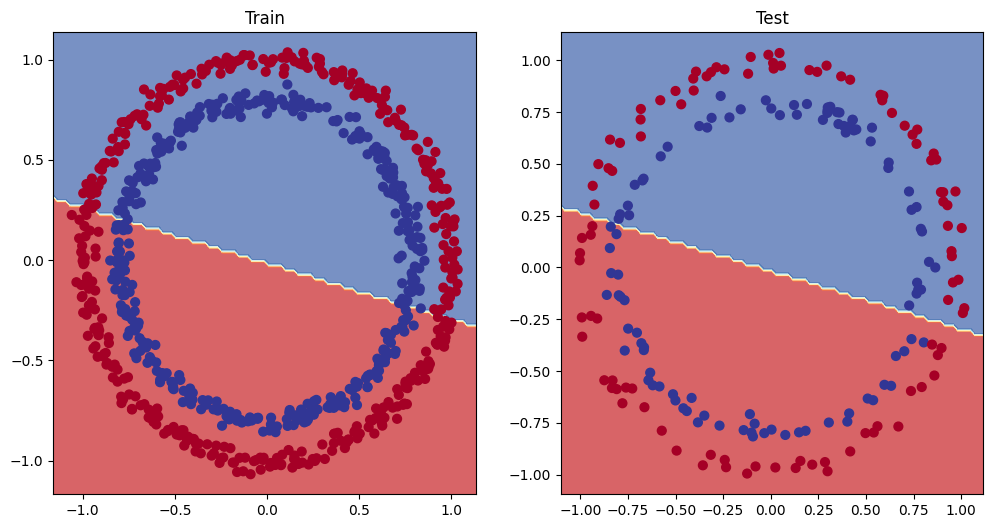

In [ ]:
# plot decision boundary of the model
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

> Since the model we pick is linear so this line is trying to seperate the layers by a line only

# 5. Imporoving a model

In [ ]:
# 11:07:50 Video | Day 5

In [ ]:
class circleModelV1(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features= 2, out_features= 20)
    self.layer_2 = nn.Linear(in_features= 20, out_features= 10)
    self.layer_3 = nn.Linear(in_features= 10, out_features= 5)
    self.layer_4 = nn.Linear(in_features= 5, out_features= 1)

  def forward(self, X):
    return self.layer_4(self.layer_3(self.layer_2(self.layer_1(X))))


# creating object of the class
model_1 = circleModelV1()
model_1

circleModelV1(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=5, bias=True)
  (layer_4): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# model_1.state_dict()

In [ ]:
# create loss function
loss_fnct = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr= 0.1)

In [ ]:
# write a training and validation loop
torch.manual_seed(42)

# train for longer
epochs= 1000

# device agnostic code
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)
model_1 = model_1.to(device)

for epoch in range(epochs):
  ### Forward Pass (initializing training mode)
  model_1.train()

  # 1. Forward pass
  train_logits = model_1(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits))

  # 2. Loss / Accuracy
  train_loss = loss_fnct(train_logits, y_train)
  train_acc = accuracy_fnct(y_pred= train_preds, y_true= y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backward pass
  train_loss.backward()

  # 5. optimizer steps
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    # 1. foward pass
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the loss
    test_loss = loss_fnct(test_logits, y_test)
    test_acc = accuracy_fnct(y_pred= test_preds, y_true= y_test)

    # 3. print out what's happening
    if epoch%20 == 0:
      print(f"Epoch : {epoch} | Train Loss {train_loss:.5f} | Train Accuracy {train_acc:.2f}% | Test Loss {test_loss:.5f} | Test Accuracy {test_acc:.2f}%")

Epoch : 0 | Train Loss 0.70414 | Train Accuracy 50.00% | Test Loss 0.70119 | Test Accuracy 50.00%
Epoch : 20 | Train Loss 0.69470 | Train Accuracy 40.75% | Test Loss 0.69294 | Test Accuracy 46.50%
Epoch : 40 | Train Loss 0.69371 | Train Accuracy 48.12% | Test Loss 0.69263 | Test Accuracy 51.00%
Epoch : 60 | Train Loss 0.69342 | Train Accuracy 50.12% | Test Loss 0.69295 | Test Accuracy 48.00%
Epoch : 80 | Train Loss 0.69326 | Train Accuracy 50.12% | Test Loss 0.69328 | Test Accuracy 47.50%
Epoch : 100 | Train Loss 0.69316 | Train Accuracy 49.75% | Test Loss 0.69356 | Test Accuracy 50.50%
Epoch : 120 | Train Loss 0.69309 | Train Accuracy 50.25% | Test Loss 0.69380 | Test Accuracy 48.50%
Epoch : 140 | Train Loss 0.69305 | Train Accuracy 50.50% | Test Loss 0.69400 | Test Accuracy 48.00%
Epoch : 160 | Train Loss 0.69303 | Train Accuracy 50.38% | Test Loss 0.69416 | Test Accuracy 48.00%
Epoch : 180 | Train Loss 0.69301 | Train Accuracy 50.62% | Test Loss 0.69429 | Test Accuracy 47.00%
Epoch 

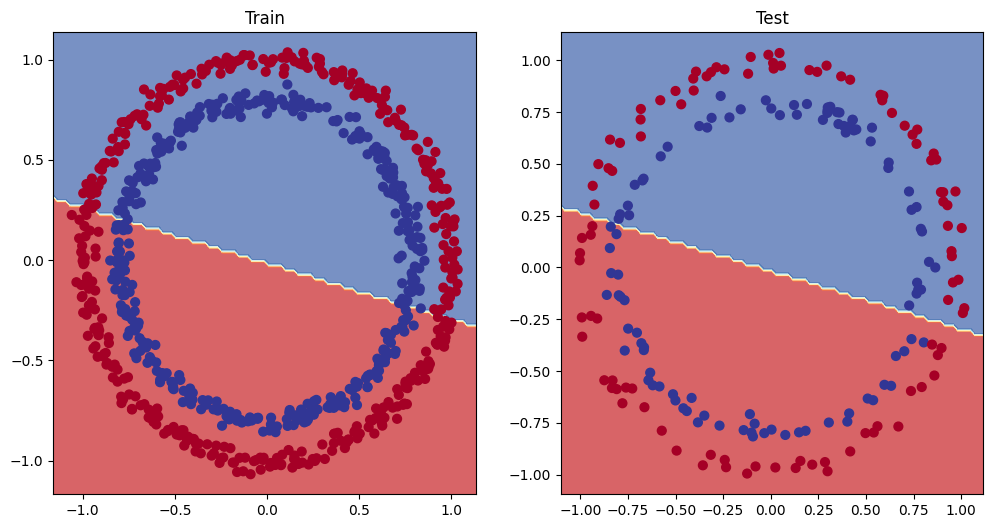

In [ ]:
# plot decision boundary of the model
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## The missing piece - Non Linearity

### 6.1 Recreating the non-linear data

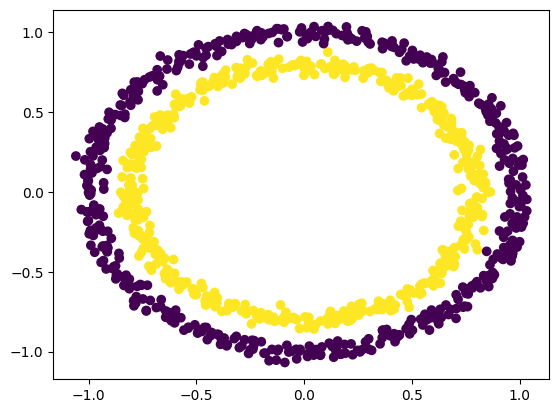

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples= 1000,
                    noise= 0.03,
                    random_state= 42)

plt.scatter(x= X[:,0], y=X[:,1], c= y)

In [ ]:
# train test split
import torch
from sklearn.model_selection import train_test_split

# turn data into tensor
# X = torch.tensor(X).type(torch.float) # This is one of the way
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)
# put all the data in the device
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

## Building a Model with Non-linearity

In [ ]:
from torch import nn

class circleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features= 2, out_features= 10)
    self.layer_2 = nn.Linear(in_features= 10, out_features= 20)
    self.layer_3 = nn.Linear(in_features= 20, out_features= 5)
    self.layer_4 = nn.Linear(in_features= 5, out_features= 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    # where we should put non-linerity in
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

# creating new object
model_3 = circleModelV2().to(device)
model_3

circleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=5, bias=True)
  (layer_4): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# setting up the loss function and optimizer
loss_fnct = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params= model_3.parameters(),
                            lr= 0.1)

## Training model with Non-linearity

In [ ]:
# random seed
torch.manual_seed(42)

epochs= 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  train_logits = model_3(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits))

  # 2. Loss
  train_loss = loss_fnct(train_logits, y_train)
  train_acc = accuracy_fnct(y_pred= train_preds, y_true= y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. backward pass
  train_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. forward
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Loss & Accuracy
    test_loss = loss_fnct(test_logits, y_test)
    test_acc = accuracy_fnct(y_pred= test_preds, y_true= y_test) # something is wrong in test accuracy

    # 3. print everything
    if epoch%50 == 0:
      print(f"Epoch : {epoch} | Train Loss {train_loss:.5f} | Train Accuracy {train_acc:.2f}% | Test Loss {test_loss:.5f} | Test Accuracy {test_acc:.2f}%")

Epoch : 0 | Train Loss 0.69611 | Train Accuracy 50.00% | Test Loss 0.69612 | Test Accuracy 50.00%
Epoch : 50 | Train Loss 0.69233 | Train Accuracy 50.00% | Test Loss 0.69227 | Test Accuracy 50.00%
Epoch : 100 | Train Loss 0.69153 | Train Accuracy 56.12% | Test Loss 0.69133 | Test Accuracy 59.50%
Epoch : 150 | Train Loss 0.69101 | Train Accuracy 64.12% | Test Loss 0.69076 | Test Accuracy 65.50%
Epoch : 200 | Train Loss 0.69055 | Train Accuracy 65.88% | Test Loss 0.69028 | Test Accuracy 65.50%
Epoch : 250 | Train Loss 0.69003 | Train Accuracy 64.88% | Test Loss 0.68975 | Test Accuracy 62.00%
Epoch : 300 | Train Loss 0.68942 | Train Accuracy 61.00% | Test Loss 0.68910 | Test Accuracy 60.00%
Epoch : 350 | Train Loss 0.68867 | Train Accuracy 58.25% | Test Loss 0.68829 | Test Accuracy 58.00%
Epoch : 400 | Train Loss 0.68774 | Train Accuracy 56.50% | Test Loss 0.68730 | Test Accuracy 55.50%
Epoch : 450 | Train Loss 0.68656 | Train Accuracy 56.25% | Test Loss 0.68607 | Test Accuracy 55.50%
Epo

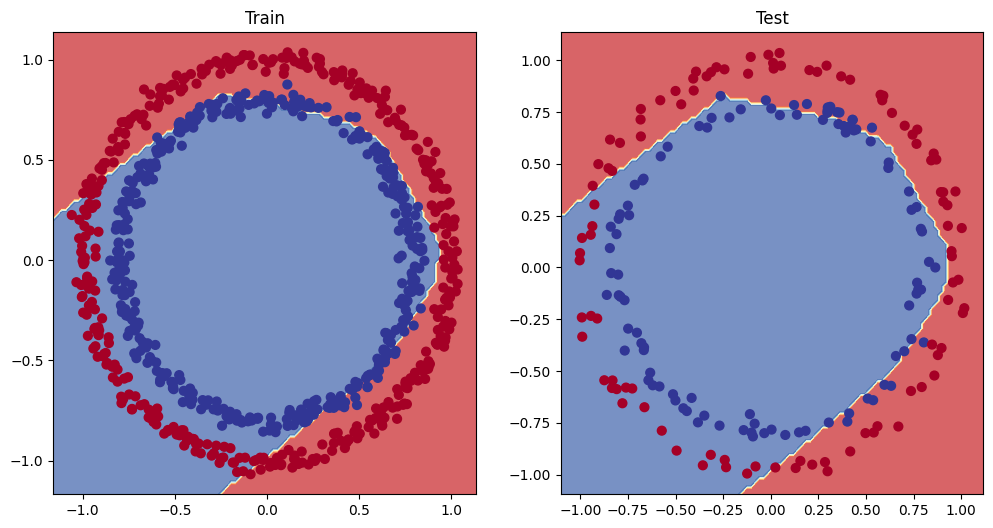

In [ ]:
# plot decision boundary of the model
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

# Replicating non-linear activation functions

# Multi-Class Classification Problem

In [ ]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Creating a Toy Multiset Class

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # blobs data set
from sklearn.model_selection import train_test_split

[]

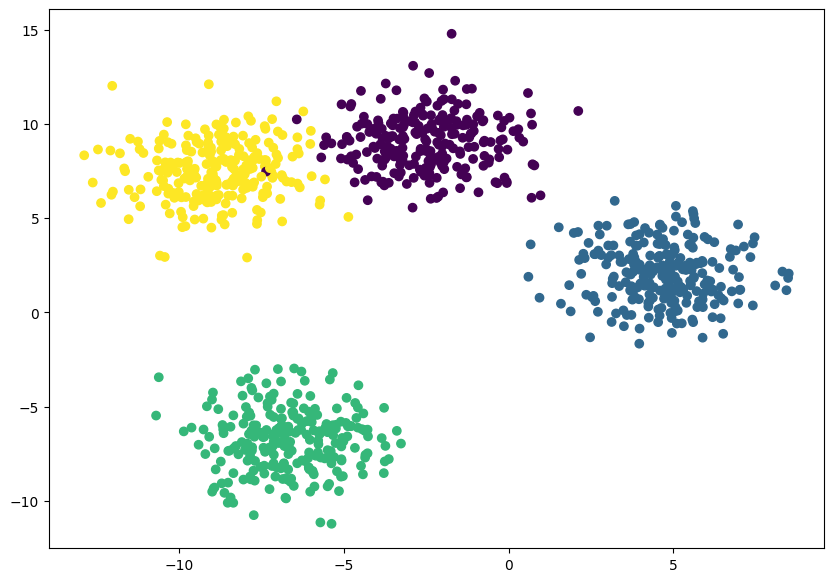

In [ ]:
# set hyperparameter for data creation
NUM_CLASSES = 4
NUM_FEATURES= 2
RANDOM_SEED = 42

# 1. create multiclass data
X_blob, y_blob = make_blobs(n_samples= 1000,
                            n_features= NUM_FEATURES,
                            centers= NUM_CLASSES,
                            cluster_std= 1.5, # give the cluster little thing
                            random_state= RANDOM_SEED)

# 2. Turn data into tensors
X_blob, y_blob = torch.tensor(X_blob).type(torch.float), torch.tensor(y_blob).type(torch.float)
X_blob, y_blob = X_blob.to(device), y_blob.to(device)

# 3. split into train test
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_blob, y_blob, test_size= 0.2, random_state= 42)

# 4. visualize visualize
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0].to("cpu"), X_blob[:,1].to("cpu"), c= y_blob.to("cpu"))
plt.plot()

## Building a Multi Class Classification Model

In [ ]:
class multiClassModelV0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units= 8):
    '''Initialising a multiclass classification model.

    Args:
      input_features (int)  - Number of input features to the model
      output_features (int) - Number of ouput features (classes) to the model
      hidden_units          - Number of hidden layers
    return:

    Examples:
    '''
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features= input_features, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# creating object
multi_model = multiClassModelV0(input_features=2, output_features=4).to(device)
multi_model

multiClassModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

```python
class multiClassModelV0(nn.Module):
  def __init__(self, input f):
    '''Initialising a multiclass classification model.

    Args:
      input_features (int)  - Number of input features to the model
      output_features (int) - Number of ouput features (classes) to the model
      hidden_units          - Number of hidden layers
    return:
      
    Examples:

    '''
    super().__init__()

    # defining layers
    self.layer_1 = nn.Linear(in_features= 2, out_features= 10)
    self.layer_2 = nn.Linear(in_features= 10, out_features= 20)
    self.layer_3 = nn.Linear(in_features= 20, out_features= 30)
    self.layer_4 = nn.Linear(in_features= 30, out_features= 10)
    self.layer_5 = nn.Linear(in_features= 10, out_features= 4)
    self.relu = nn.ReLU()

    def forward(self, x):
      return self.layer_5(self.relu(self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))))

# creating object
multi_model = multiClassModelV0()
multi_model
```

In [ ]:
# create a loss function
loss_fnct = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.SGD(params= multi_model.parameters(),
                            lr= 0.1)

## Getting prediction probabilities for a multiclass PyTorch Model

In [ ]:
next(multi_model.parameters()).device

device(type='cpu')

In [ ]:
multi_model.eval()
with torch.inference_mode():
  Xb_test_logits = multi_model(Xb_test)

Xb_test_logits[:5]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])

In [ ]:
# convert those logits into prediction probabilities
xb_test_probs = torch.softmax(Xb_test_logits, dim=1)
print(yb_test[:5])
print(xb_test_probs[:5])

tensor([1., 3., 2., 1., 0.])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [ ]:
torch.sum(xb_test_probs[0]) # what if we sum of 0th row # i.e. probabilities has been distributed in class wise

tensor(1.0000)

In [ ]:
torch.max(xb_test_probs[0]) # which class has the maximum probabilities

tensor(0.3244)

In [ ]:
torch.argmax(xb_test_probs[0]) # to get the index of that | or we can say which class it belongs to

tensor(1)

In [ ]:
# convert model's prediction probabilities to predictions
Xb_test_preds = torch.argmax(xb_test_probs, dim=1)
Xb_test_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

## Building Training and Testing Loop

In [ ]:
torch.manual_seed(42)

epochs =100

for epoch in range(epochs):
  ### Training
  multi_model.train()
  # 1. forward pass
  Xb_train_logits = multi_model(Xb_train)
  Xb_train_preds = torch.argmax(torch.softmax(Xb_train_logits, dim=1), dim=1)
  '''Xb_train_preds = torch.softmax(Xb_train_logits, dim=1).argmax(dim=1) # can write in this way as well'''

  # 2. loss
  Xb_train_loss = loss_fnct(Xb_train_logits,yb_train.type(torch.long))
  Xb_train_acc = accuracy_fnct(y_pred= Xb_train_preds, y_true= yb_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backward pass
  Xb_train_loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing
  multi_model.eval()
  with torch.inference_mode():
    # 1. forward
    Xb_test_logits = multi_model(Xb_test)
    Xb_test_preds = torch.argmax(Xb_test_logits, dim=1)

    # 2. loss
    Xb_test_loss = loss_fnct(Xb_test_logits, yb_test.type(torch.long))
    Xb_test_acc = accuracy_fnct(Xb_test_preds,yb_test)

    # 3. print everything
    if epoch%10 == 0:
      print(f"Epoch : {epoch} | Train Loss {Xb_train_loss:.5f} | Train Accuracy {Xb_train_acc:.2f}% | Test Loss {Xb_test_loss:.5f} | Test Accuracy {Xb_test_acc:.2f}%")

Epoch : 0 | Train Loss 1.15883 | Train Accuracy 40.38% | Test Loss 1.07554 | Test Accuracy 48.00%
Epoch : 10 | Train Loss 0.64476 | Train Accuracy 96.75% | Test Loss 0.66069 | Test Accuracy 97.50%
Epoch : 20 | Train Loss 0.42535 | Train Accuracy 98.50% | Test Loss 0.43074 | Test Accuracy 100.00%
Epoch : 30 | Train Loss 0.25294 | Train Accuracy 99.12% | Test Loss 0.24508 | Test Accuracy 99.50%
Epoch : 40 | Train Loss 0.11232 | Train Accuracy 99.25% | Test Loss 0.10229 | Test Accuracy 99.50%
Epoch : 50 | Train Loss 0.06627 | Train Accuracy 99.25% | Test Loss 0.05848 | Test Accuracy 99.50%
Epoch : 60 | Train Loss 0.05068 | Train Accuracy 99.25% | Test Loss 0.04293 | Test Accuracy 99.50%
Epoch : 70 | Train Loss 0.04300 | Train Accuracy 99.25% | Test Loss 0.03491 | Test Accuracy 99.50%
Epoch : 80 | Train Loss 0.03836 | Train Accuracy 99.25% | Test Loss 0.02988 | Test Accuracy 99.50%
Epoch : 90 | Train Loss 0.03525 | Train Accuracy 99.25% | Test Loss 0.02663 | Test Accuracy 99.50%


In [ ]:
# day 5 : 13:37:15

# Prediction and evaluation with a PyTorch Multi-class Classification Model

In [ ]:
# make predictions
multi_model.eval()
with torch.inference_mode():
  Xb_test_logits = multi_model(Xb_test)
  Xb_test_preds = torch.argmax(Xb_test_logits, dim=1)

Xb_test_preds[:5]

tensor([1, 3, 2, 1, 0])

[]

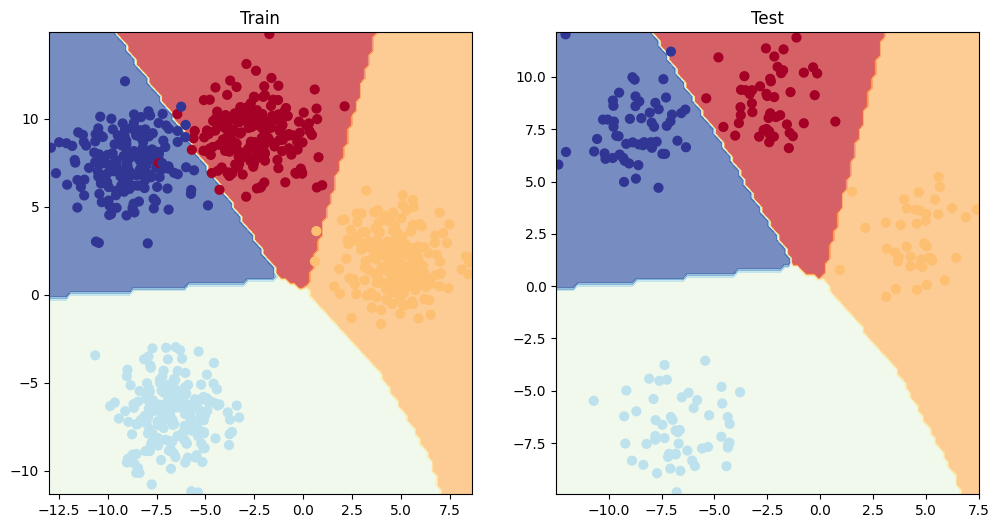

In [ ]:
# let's get visual
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(multi_model, Xb_train, yb_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(multi_model, Xb_test, yb_test)
plt.plot()

> **Lession Learnt**:
- This also can we solved without introducing non-linearity. i.e. `nn.ReLU`. Because here the classes are still linearly seperable from other classes.
- `Accuracy` is not the best matrics for `Imbalanced dataset`.

-----
Classification Metrics
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Metrics

# Extra

## Torchmetrics
> It has torch similar functions

In [ ]:
! pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 39.4 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

# setup metric
torchmetrics_accuracy = Accuracy(task="multiclass", num_classes= 4) # .to(device)

# calculating accuracy
torchmetrics_accuracy(Xb_test_preds, yb_test)*100

tensor(99.5000)

### Creating Spiral dataset

In [ ]:
import numpy as np

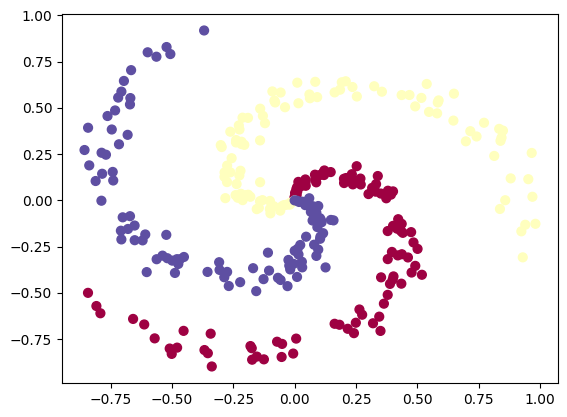

In [ ]:
def spiral_dataset():
  N = 100 # number of points per class
  D = 2 # dimensionality
  K = 3 # number of classes
  X = np.zeros((N*K,D)) # data matrix (each row = single example)
  y = np.zeros(N*K, dtype='uint8') # class labels
  for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
  # lets visualize the data
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
  plt.show()

spiral_dataset()